# Lib

In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function 
-  

In [2]:

def analyze_images_in_folder(folder_path):
    """
    Analyzes images in a single specified folder, counts unique shapes and their occurrences,
    calculates file size ranges, and plots a histogram of file sizes.

    Args:
        folder_path (str): The path to the folder containing the images.
    """

    folder_name = os.path.basename(folder_path)
    folder_data = {
        "total_images": 0,
        "unique_shapes_count": {},  # Dictionary to store shape: count
        "file_sizes_kb": [],
        "file_sizes_bytes": [],
    }

    print(f"\nAnalyzing folder: {folder_name}")

    try:
        if not os.path.isdir(folder_path):
            raise FileNotFoundError(f"Folder not found: {folder_path}")

        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            # Process only image files
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                folder_data["total_images"] += 1

                try:
                    # Get image shape
                    with Image.open(file_path) as img:
                        shape = img.size  # (width, height)
                        if shape not in folder_data["unique_shapes_count"]:
                            folder_data["unique_shapes_count"][shape] = 0
                        folder_data["unique_shapes_count"][shape] += 1

                    # Get file size
                    file_size_bytes = os.path.getsize(file_path)
                    file_size_kb = file_size_bytes / 1024
                    folder_data["file_sizes_kb"].append(file_size_kb)
                    folder_data["file_sizes_bytes"].append(file_size_bytes)

                except Exception as e:
                    print(f"Error processing {file_name}: {e}")

        # Statistics for the folder
        if folder_data["total_images"] > 0:
            min_size_kb = min(folder_data["file_sizes_kb"])
            max_size_kb = max(folder_data["file_sizes_kb"])

            print(f"  - Total images: {folder_data['total_images']}")
            print(f"  - Number of unique image shapes: {len(folder_data['unique_shapes_count'])}")
            print(f"  - Unique shapes and counts: {folder_data['unique_shapes_count']}")
            print(f"  - File size range (KB): {min_size_kb:.2f} - {max_size_kb:.2f}")

            # File size histogram
            plot_file_size_histogram(folder_data["file_sizes_kb"], folder_name)
        else:
            print(f"  - No images found in the folder.")

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")


def plot_file_size_histogram(file_sizes_kb, folder_name):
    """
    Plots a histogram of file sizes in KB, divided into specific ranges.

    Args:
        file_sizes_kb (list): A list of file sizes in kilobytes.
        folder_name (str): name of folder.
    """

    # Define size bins
    bins = [10, 20, 30, 50, 60, 70, 100, 1024]
    labels = ["10-20KB", "20-30KB", "30-50KB", "50-60KB", "60-70KB", "70-100KB", "100-1024KB"]

    # Categorize file sizes into bins
    counts = []
    for i in range(len(bins)-1):
        count = 0
        for size in file_sizes_kb:
            if bins[i] <= size < bins[i+1]:
                count += 1
        counts.append(count)
        
    # Handle the case where some files are smaller than the smallest bin
    if min(file_sizes_kb)<bins[0]:
        print(f"Warning: Some files are smaller than {bins[0]} KB. They will not be counted in histogram")

    # Handle the case where some files are larger than the largest bin
    if max(file_sizes_kb)>=bins[-1]:
        print(f"Warning: Some files are larger or equal to {bins[-1]} KB. They will not be counted in histogram")
    
    # Create the bar plot
    plt.figure(figsize=(12, 6))  # Wider figure for more bins
    plt.bar(labels, counts, color=['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightblue', 'lightyellow', 'plum'])
    plt.xlabel("File Size Ranges (KB)")
    plt.ylabel("Number of Images")
    plt.title(f"File Size Distribution in {folder_name}")
    plt.grid(axis='y', alpha=0.75)

    # Add count labels on top of the bars
    for i, count in enumerate(counts):
        plt.text(i, count + 0.1*max(counts), str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

In [3]:

def find_files_with_specific_shape(folder_path, target_shape):
    """
    Finds and prints the names of image files in a folder that have a specific shape.

    Args:
        folder_path (str): The path to the folder containing the images.
        target_shape (tuple): The target shape (width, height) to search for.
    """

    try:
        if not os.path.isdir(folder_path):
            raise FileNotFoundError(f"Folder not found: {folder_path}")

        print(f"Searching for files with shape {target_shape} in folder: {folder_path}")

        found_files = []
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)

            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                try:
                    with Image.open(file_path) as img:
                        if img.size == target_shape:
                            found_files.append(file_name)
                except Exception as e:
                    print(f"Error processing {file_name}: {e}")

        if found_files:
            print(f"Files with shape {target_shape} found:")
            for file_name in found_files:
                print(f"  - {file_name}")
        else:
            print(f"No files with shape {target_shape} found in the folder.")

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"An error occurred: {e}")

# Analyze 


Analyzing folder: normal
  - Total images: 2727
  - Number of unique image shapes: 7
  - Unique shapes and counts: {(224, 224): 2286, (1024, 1024): 12, (2180, 2660): 7, (2660, 2180): 2, (2430, 1994): 7, (2386, 1994): 1, (300, 162): 412}
  - File size range (KB): 13.60 - 1706.43


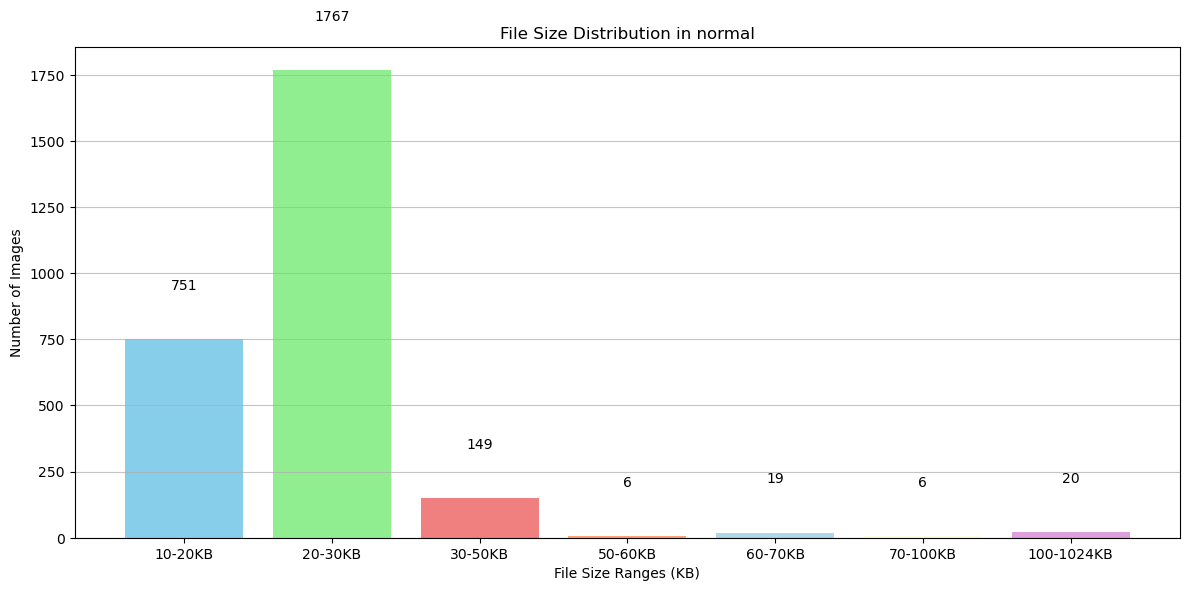

In [4]:
# Example usage:
folder_to_analyze = r"E:\DL-for-Knee-decease-diagnosis\dataset\train\normal"  # Replace with your path
analyze_images_in_folder(folder_to_analyze)

## Analyze all each folder

In [8]:
base_path = r"E:\DL-for-Knee-decease-diagnosis\dataset\train"  # Replace with your path
# excluded_folders = ["osteopenia", "osteoporosis"]
excluded_folders = [""]

In [9]:
listname = [
    f
    for f in os.listdir(base_path)
    if os.path.isdir(os.path.join(base_path, f)) and f not in excluded_folders
]
listname

['normal',
 'oa_doubtful',
 'oa_mild',
 'oa_moderate',
 'oa_severe',
 'osteopenia',
 'osteoporosis']

0----------

Analyzing folder: normal
  - Total images: 2727
  - Number of unique image shapes: 7
  - Unique shapes and counts: {(224, 224): 2286, (1024, 1024): 12, (2180, 2660): 7, (2660, 2180): 2, (2430, 1994): 7, (2386, 1994): 1, (300, 162): 412}
  - File size range (KB): 13.60 - 1706.43


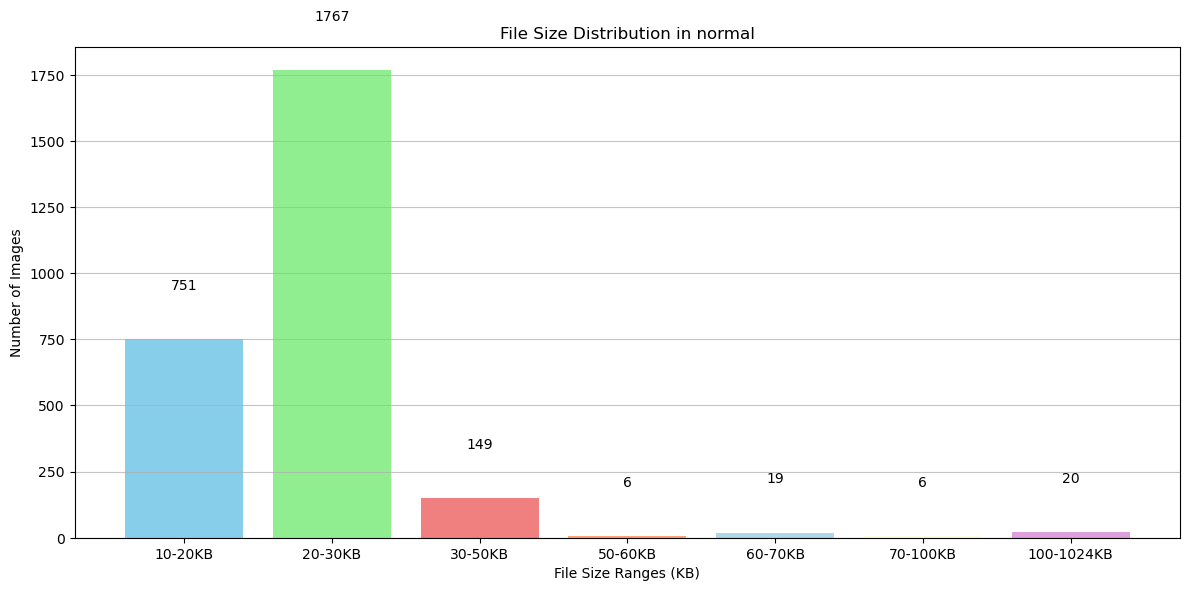

1----------

Analyzing folder: oa_doubtful
  - Total images: 1428
  - Number of unique image shapes: 2
  - Unique shapes and counts: {(224, 224): 1046, (300, 162): 382}
  - File size range (KB): 14.07 - 70.68


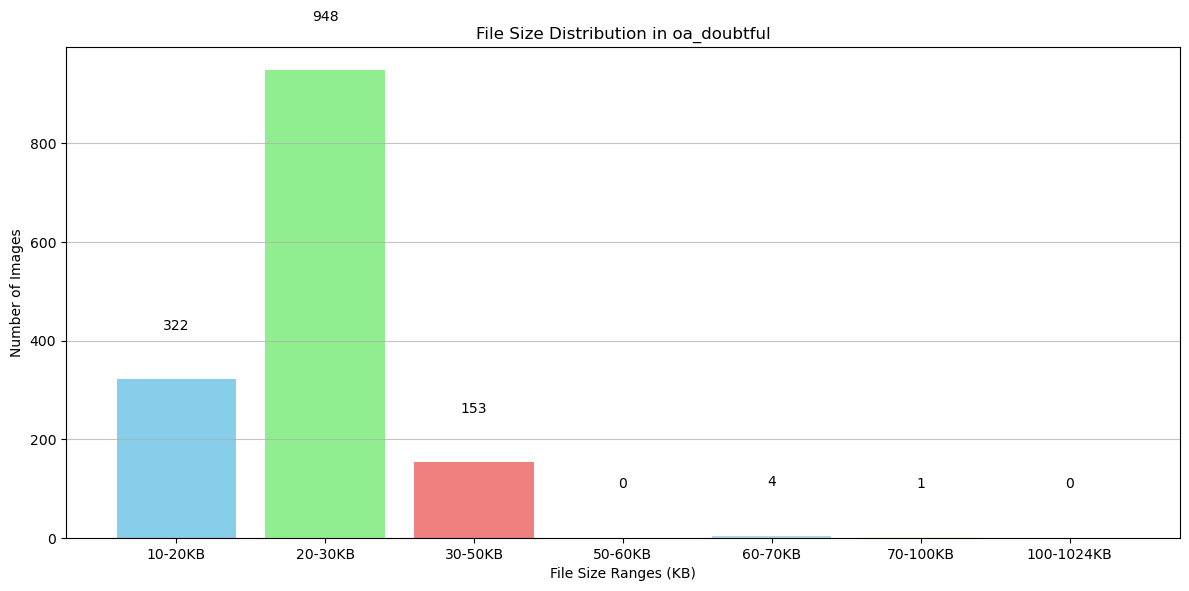

2----------

Analyzing folder: oa_mild
  - Total images: 1702
  - Number of unique image shapes: 2
  - Unique shapes and counts: {(224, 224): 1516, (300, 162): 186}
  - File size range (KB): 12.33 - 71.46


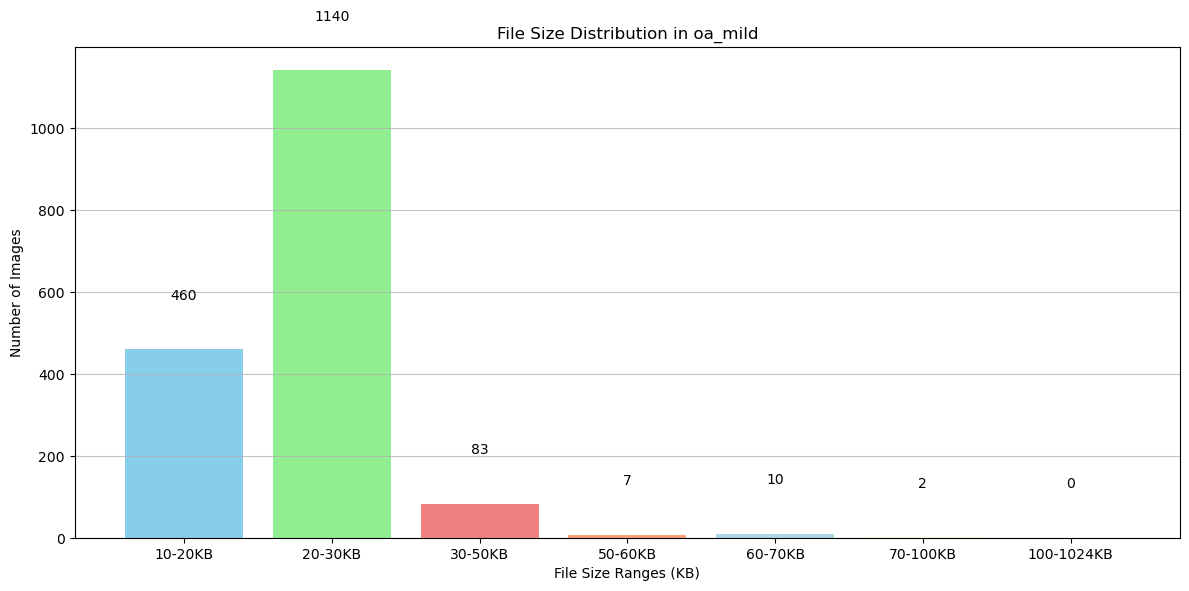

3----------

Analyzing folder: oa_moderate
  - Total images: 934
  - Number of unique image shapes: 3
  - Unique shapes and counts: {(224, 224): 757, (300, 162): 175, (640, 161): 2}
  - File size range (KB): 13.09 - 73.70


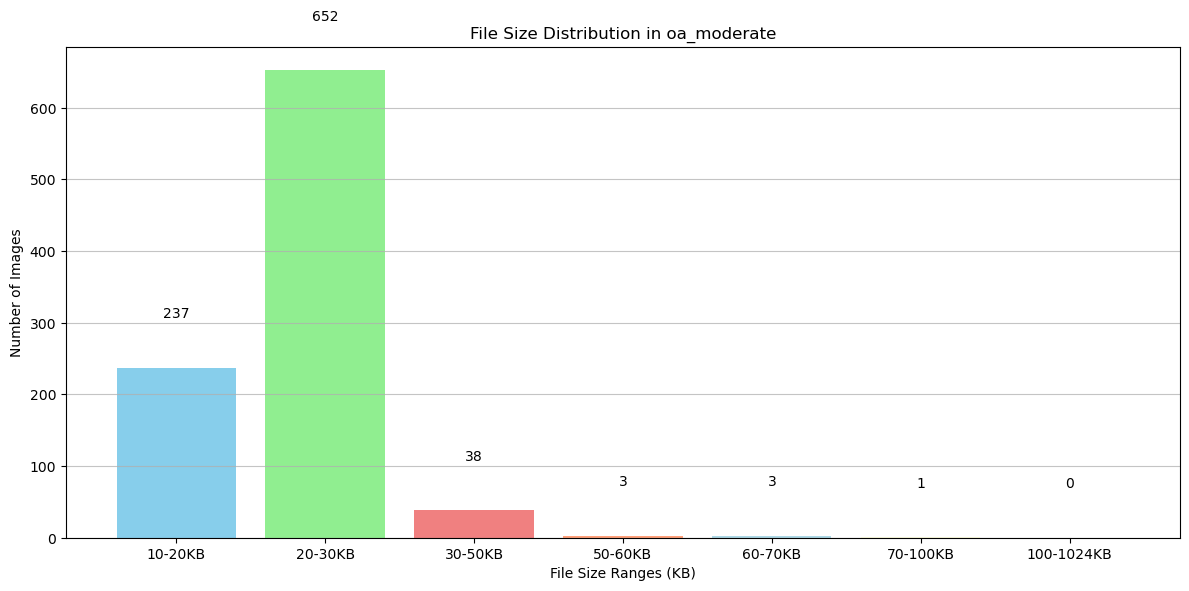

4----------

Analyzing folder: oa_severe
  - Total images: 338
  - Number of unique image shapes: 2
  - Unique shapes and counts: {(224, 224): 173, (300, 162): 165}
  - File size range (KB): 13.79 - 45.32


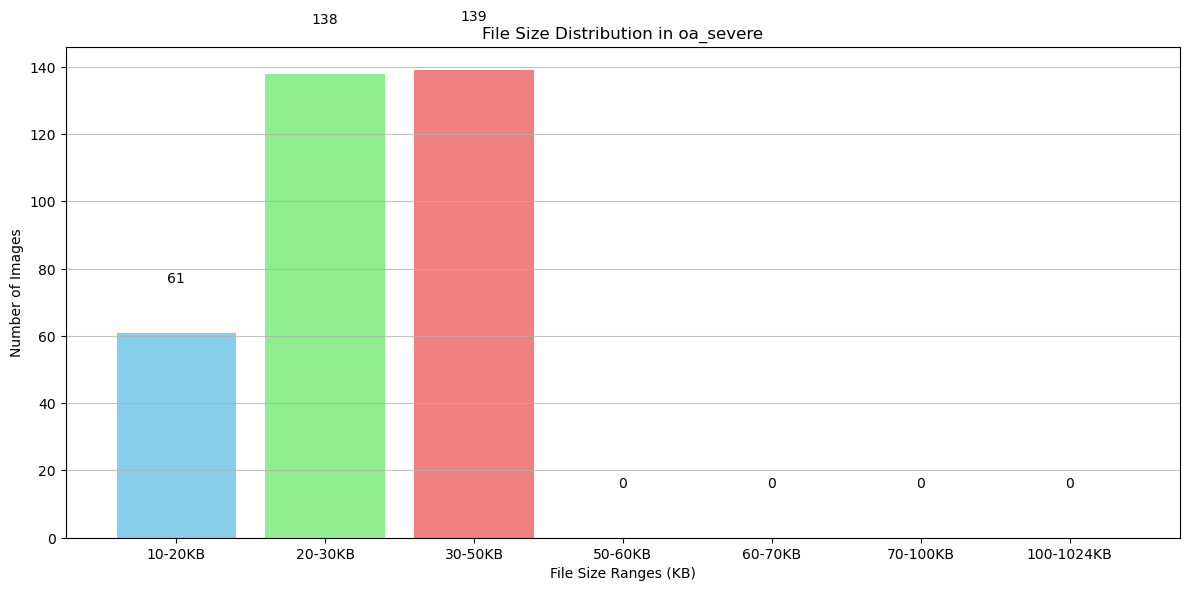

5----------

Analyzing folder: osteopenia
  - Total images: 124
  - Number of unique image shapes: 8
  - Unique shapes and counts: {(1024, 1024): 44, (2430, 1994): 27, (1994, 2430): 1, (2430, 1910): 2, (2402, 1994): 1, (2378, 1994): 1, (2180, 2660): 43, (2660, 2180): 5}
  - File size range (KB): 219.46 - 2255.46


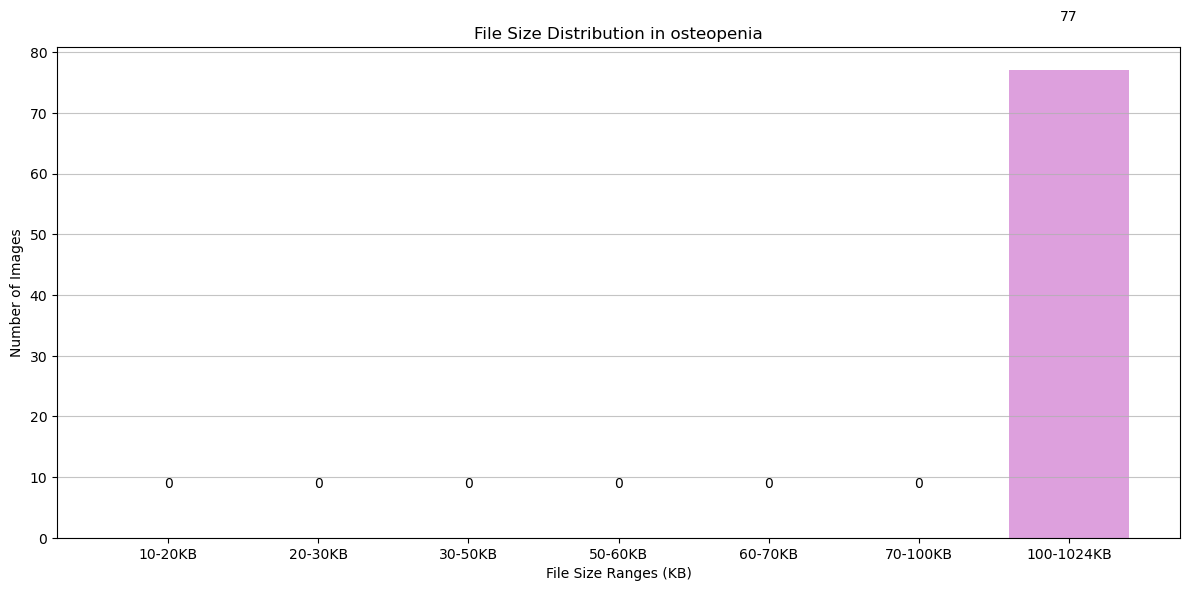

6----------

Analyzing folder: osteoporosis
  - Total images: 40
  - Number of unique image shapes: 5
  - Unique shapes and counts: {(1024, 1024): 7, (2180, 2660): 11, (2660, 2180): 3, (2398, 1994): 1, (2430, 1994): 18}
  - File size range (KB): 267.22 - 1886.88


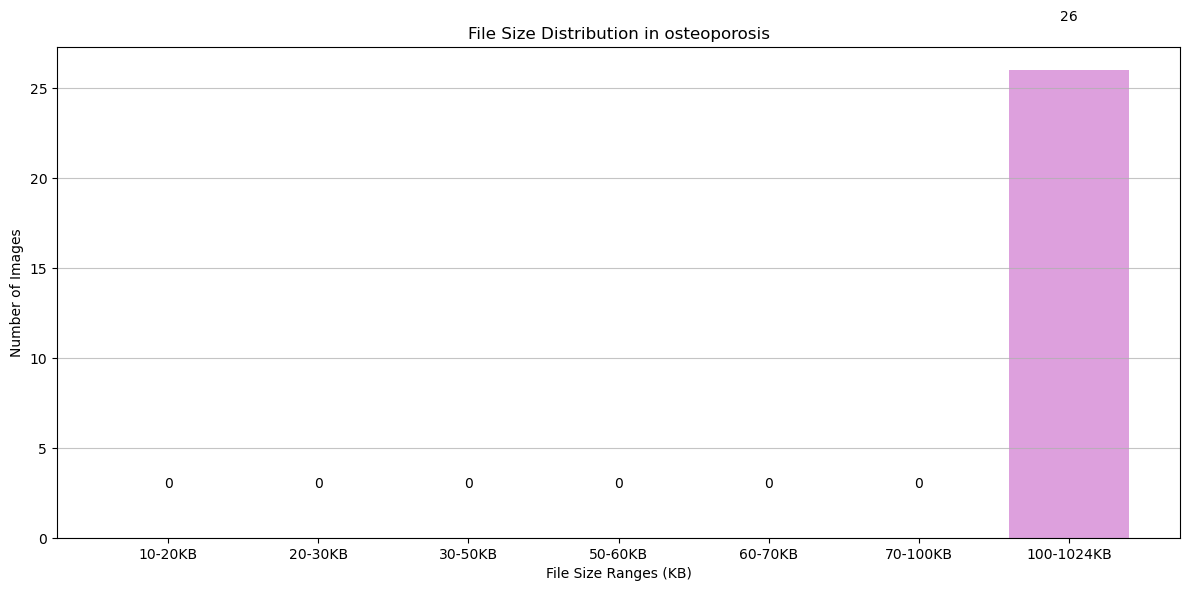

In [10]:
for i, folder_name in enumerate(listname):
    print(f"{i}----------")
    folder_to_analyze = os.path.join(base_path, folder_name)

    analyze_images_in_folder(folder_to_analyze)


## Note
- Mình có những file có kích thức khác nhau nên mình không biết giải quyết là phóng to hay thu nhỏ cái này để cùng bộ data ??
- Mình cứ thực nghiệm là data đã cân bằng cái đã. -> Mới oversampling data lên. 
  - 1. Mình đang nghĩ cách đầu tiên là copy ảnh trong đống đó để tăng lên
    - Nhưng mà mình sẽ lấy size nào nhỏ mà sẽ chọn tỉ lệ generate á để tiết kiệm size. 
  - 2. Dùng model để generate data lên.  